<a href="https://colab.research.google.com/github/ilmimris/bangkit-bgd2a-virus-covid-vs-noncovid/blob/master/Covid_vs_Noncovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get Kaggle dataset for Non-COVID viral pneumonia

In [ ]:
! pip install -q kaggle

In [ ]:
# Upload Kaggle API key

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gabrieldaely","key":"26bf1049d09710bdea490aa8549a8716"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d 'paultimothymooney/chest-xray-pneumonia'

100% 2.29G/2.29G [00:28<00:00, 67.3MB/s]
100% 2.29G/2.29G [00:28<00:00, 85.7MB/s]


In [ ]:
! unzip -q chest-xray-pneumonia.zip
! rm -r chest-xray-pneumonia.zip

Get Github dataset for Covid viral pneumonia.

In [ ]:
! git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 282, done.
remote: Counting objects: 100% (282/282), done.
remote: Compressing objects: 100% (207/207), done.
remote: Total 3127 (delta 118), reused 223 (delta 75), pack-reused 2845
Receiving objects: 100% (3127/3127), 573.06 MiB | 36.44 MiB/s, done.
Resolving deltas: 100% (1222/1222), done.
Checking out files: 100% (969/969), done.


Data Preparation

In [ ]:
import pandas as pd
import os
import random
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
metadata = pd.read_csv('./covid-chestxray-dataset/metadata.csv')
metadata = metadata[['finding','modality','folder','filename']]

In [ ]:
metadata = metadata[metadata['finding'] == 'COVID-19']
metadata = metadata[metadata['modality'] == 'X-ray']

In [ ]:
COVID_DIR = './covid/'
NONCOVID_DIR = './noncovid/'

# Create folders for each dataset
try:
    os.mkdir(COVID_DIR)
    os.mkdir(NONCOVID_DIR)
except OSError:
    pass

In [ ]:
# Covid data
for _, row in metadata.iterrows():
    copyfile('./covid-chestxray-dataset/' + row['folder'] + '/' + row['filename'],
             './covid/' + row['filename'])

In [14]:
# Non-covid data
for file in os.listdir('./chest_xray/train/PNEUMONIA/'):
    if 'virus' in file:
        copyfile('./chest_xray/train/PNEUMONIA/' + file, './noncovid/' + file)
    else:
        continue

In [19]:
files = os.listdir(NONCOVID_DIR)
for file in random.sample(files,800):
    os.remove(NONCOVID_DIR + file)

In [20]:
print(len(os.listdir(COVID_DIR)))
print(len(os.listdir(NONCOVID_DIR)))

464
545


Train val split

In [21]:
MAIN_DIR = './covid-noncovid/'
TRAIN_DIR = './covid-noncovid/train/'
VAL_DIR = './covid-noncovid/val/'
TRAIN_COVID_DIR = './covid-noncovid/train/covid/'
TRAIN_NONCOVID_DIR = './covid-noncovid/train/noncovid/'
VAL_COVID_DIR = './covid-noncovid/val/covid/'
VAL_NONCOVID_DIR = './covid-noncovid/val/noncovid/'

# Create train and val folder for each dataset
try:
    os.mkdir(MAIN_DIR)
    os.mkdir(TRAIN_DIR)
    os.mkdir(VAL_DIR)
    os.mkdir(TRAIN_COVID_DIR)
    os.mkdir(TRAIN_NONCOVID_DIR)
    os.mkdir(VAL_COVID_DIR)
    os.mkdir(VAL_NONCOVID_DIR)
except OSError:
    pass

# Define a function to automate dataset splitting
def split_data(SOURCE, TRAINING, VALING, SPLIT_SIZE):
    file_list = os.listdir(SOURCE)
    file_list = random.sample(file_list,len(file_list))
    train_size = round(SPLIT_SIZE * len(file_list))
    
    for file in file_list[:train_size]:
        copyfile(SOURCE + file, TRAINING + file)
    for file in file_list[train_size:]:
        copyfile(SOURCE + file, VALING + file)

# Split each dataset
split_size = 0.9
split_data(COVID_DIR, TRAIN_COVID_DIR, VAL_COVID_DIR, split_size)
split_data(NONCOVID_DIR, TRAIN_NONCOVID_DIR, VAL_NONCOVID_DIR, split_size)

In [22]:
print(len(os.listdir(TRAIN_COVID_DIR)))
print(len(os.listdir(TRAIN_NONCOVID_DIR)))
print(len(os.listdir(VAL_COVID_DIR)))
print(len(os.listdir(VAL_NONCOVID_DIR)))

418
490
46
55


In [23]:
! zip -r ./covid-noncovid.zip ./covid-noncovid/

  adding: covid-noncovid/ (stored 0%)
  adding: covid-noncovid/val/ (stored 0%)
  adding: covid-noncovid/val/noncovid/ (stored 0%)
  adding: covid-noncovid/val/noncovid/person438_virus_889.jpeg (deflated 3%)
  adding: covid-noncovid/val/noncovid/person385_virus_770.jpeg (deflated 2%)
  adding: covid-noncovid/val/noncovid/person143_virus_289.jpeg (deflated 6%)
  adding: covid-noncovid/val/noncovid/person458_virus_945.jpeg (deflated 1%)
  adding: covid-noncovid/val/noncovid/person326_virus_672.jpeg (deflated 1%)
  adding: covid-noncovid/val/noncovid/person740_virus_1362.jpeg (deflated 1%)
  adding: covid-noncovid/val/noncovid/person1389_virus_2387.jpeg (deflated 2%)
  adding: covid-noncovid/val/noncovid/person1169_virus_1968.jpeg (deflated 1%)
  adding: covid-noncovid/val/noncovid/person353_virus_728.jpeg (deflated 2%)
  adding: covid-noncovid/val/noncovid/person1138_virus_1879.jpeg (deflated 2%)
  adding: covid-noncovid/val/noncovid/person1015_virus_1702.jpeg (deflated 2%)
  adding: cov

In [24]:
TRAIN_DIR = './covid-noncovid/train'
VAL_DIR = './covid-noncovid/val'

# Create train data generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
	TRAIN_DIR,
	target_size=(224,224),
	class_mode='binary',
    batch_size=32
)

# Create validation data generator
val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(
	VAL_DIR,
	target_size=(224,224),
	class_mode='binary',
    batch_size=32
)

Found 908 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


Build and train model.

In [25]:
densenet = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in densenet.layers:
	layer.trainable = False

mod1 = densenet.output
mod1 = MaxPooling2D()(mod1)
mod1 = Flatten()(mod1)
mod1 = Dense(256, activation="relu")(mod1)
mod1 = Dropout(0.5)(mod1)
mod1 = Dense(128, activation="relu")(mod1)
mod1 = Dropout(0.5)(mod1)
mod1 = Dense(64, activation="relu")(mod1)
mod1 = Dropout(0.5)(mod1)
mod1 = Dense(1, activation="sigmoid")(mod1)

model = Model(inputs=densenet.input, outputs=mod1)
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

29089792/29084464 [==============================] - 0s 0us/step


In [26]:
history = model.fit(train_generator, epochs = 30, 
                    validation_data = val_generator,
                    verbose = 1)

Epoch 1/30
29/29 [==============================] - 33s 1s/step - loss: 2.3991 - accuracy: 0.5859 - val_loss: 0.1087 - val_accuracy: 0.9703
Epoch 2/30
29/29 [==============================] - 31s 1s/step - loss: 0.5559 - accuracy: 0.7808 - val_loss: 0.1048 - val_accuracy: 0.9802
Epoch 3/30
29/29 [==============================] - 31s 1s/step - loss: 0.2214 - accuracy: 0.9064 - val_loss: 0.0592 - val_accuracy: 0.9703
Epoch 4/30
29/29 [==============================] - 31s 1s/step - loss: 0.2641 - accuracy: 0.8998 - val_loss: 0.0880 - val_accuracy: 0.9703
Epoch 5/30
29/29 [==============================] - 31s 1s/step - loss: 0.1989 - accuracy: 0.9284 - val_loss: 0.0586 - val_accuracy: 0.9802
Epoch 6/30
29/29 [==============================] - 31s 1s/step - loss: 0.2121 - accuracy: 0.9317 - val_loss: 0.0413 - val_accuracy: 0.9901
Epoch 7/30
29/29 [==============================] - 31s 1s/step - loss: 0.1560 - accuracy: 0.9427 - val_loss: 0.0361 - val_accuracy: 0.9901
Epoch 8/30
29/29 [==

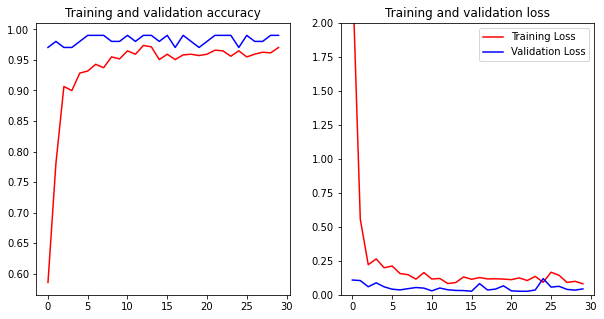

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.subplot(122)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.ylim(0,2)
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
model.save('covid_vs_noncovid9799.h5')

Convert to TF.js

In [30]:
! pip install tensorflowjs

In [31]:
! tensorflowjs_converter --input_format keras covid_vs_noncovid9799.h5 ./tfjs/